In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
red_wine_data = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

In [4]:
red_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
white_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [6]:
red_wine_data['class'] = 'red'
white_wine_data['class'] = 'white'

In [7]:
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0, ignore_index=True)

In [8]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [9]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                    object
dtype: object

In [10]:
wine_data['target'] = np.where(wine_data['class']=='white', 1, 0)

In [11]:
wine_data.corr()['target'].sort_values(ascending=True)

<ipython-input-11-de8085cefb67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_data.corr()['target'].sort_values(ascending=True)


volatile acidity       -0.653036
chlorides              -0.512678
sulphates              -0.487218
fixed acidity          -0.486740
density                -0.390645
pH                     -0.329129
alcohol                 0.032970
quality                 0.119323
citric acid             0.187397
residual sugar          0.348821
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
target                  1.000000
Name: target, dtype: float64

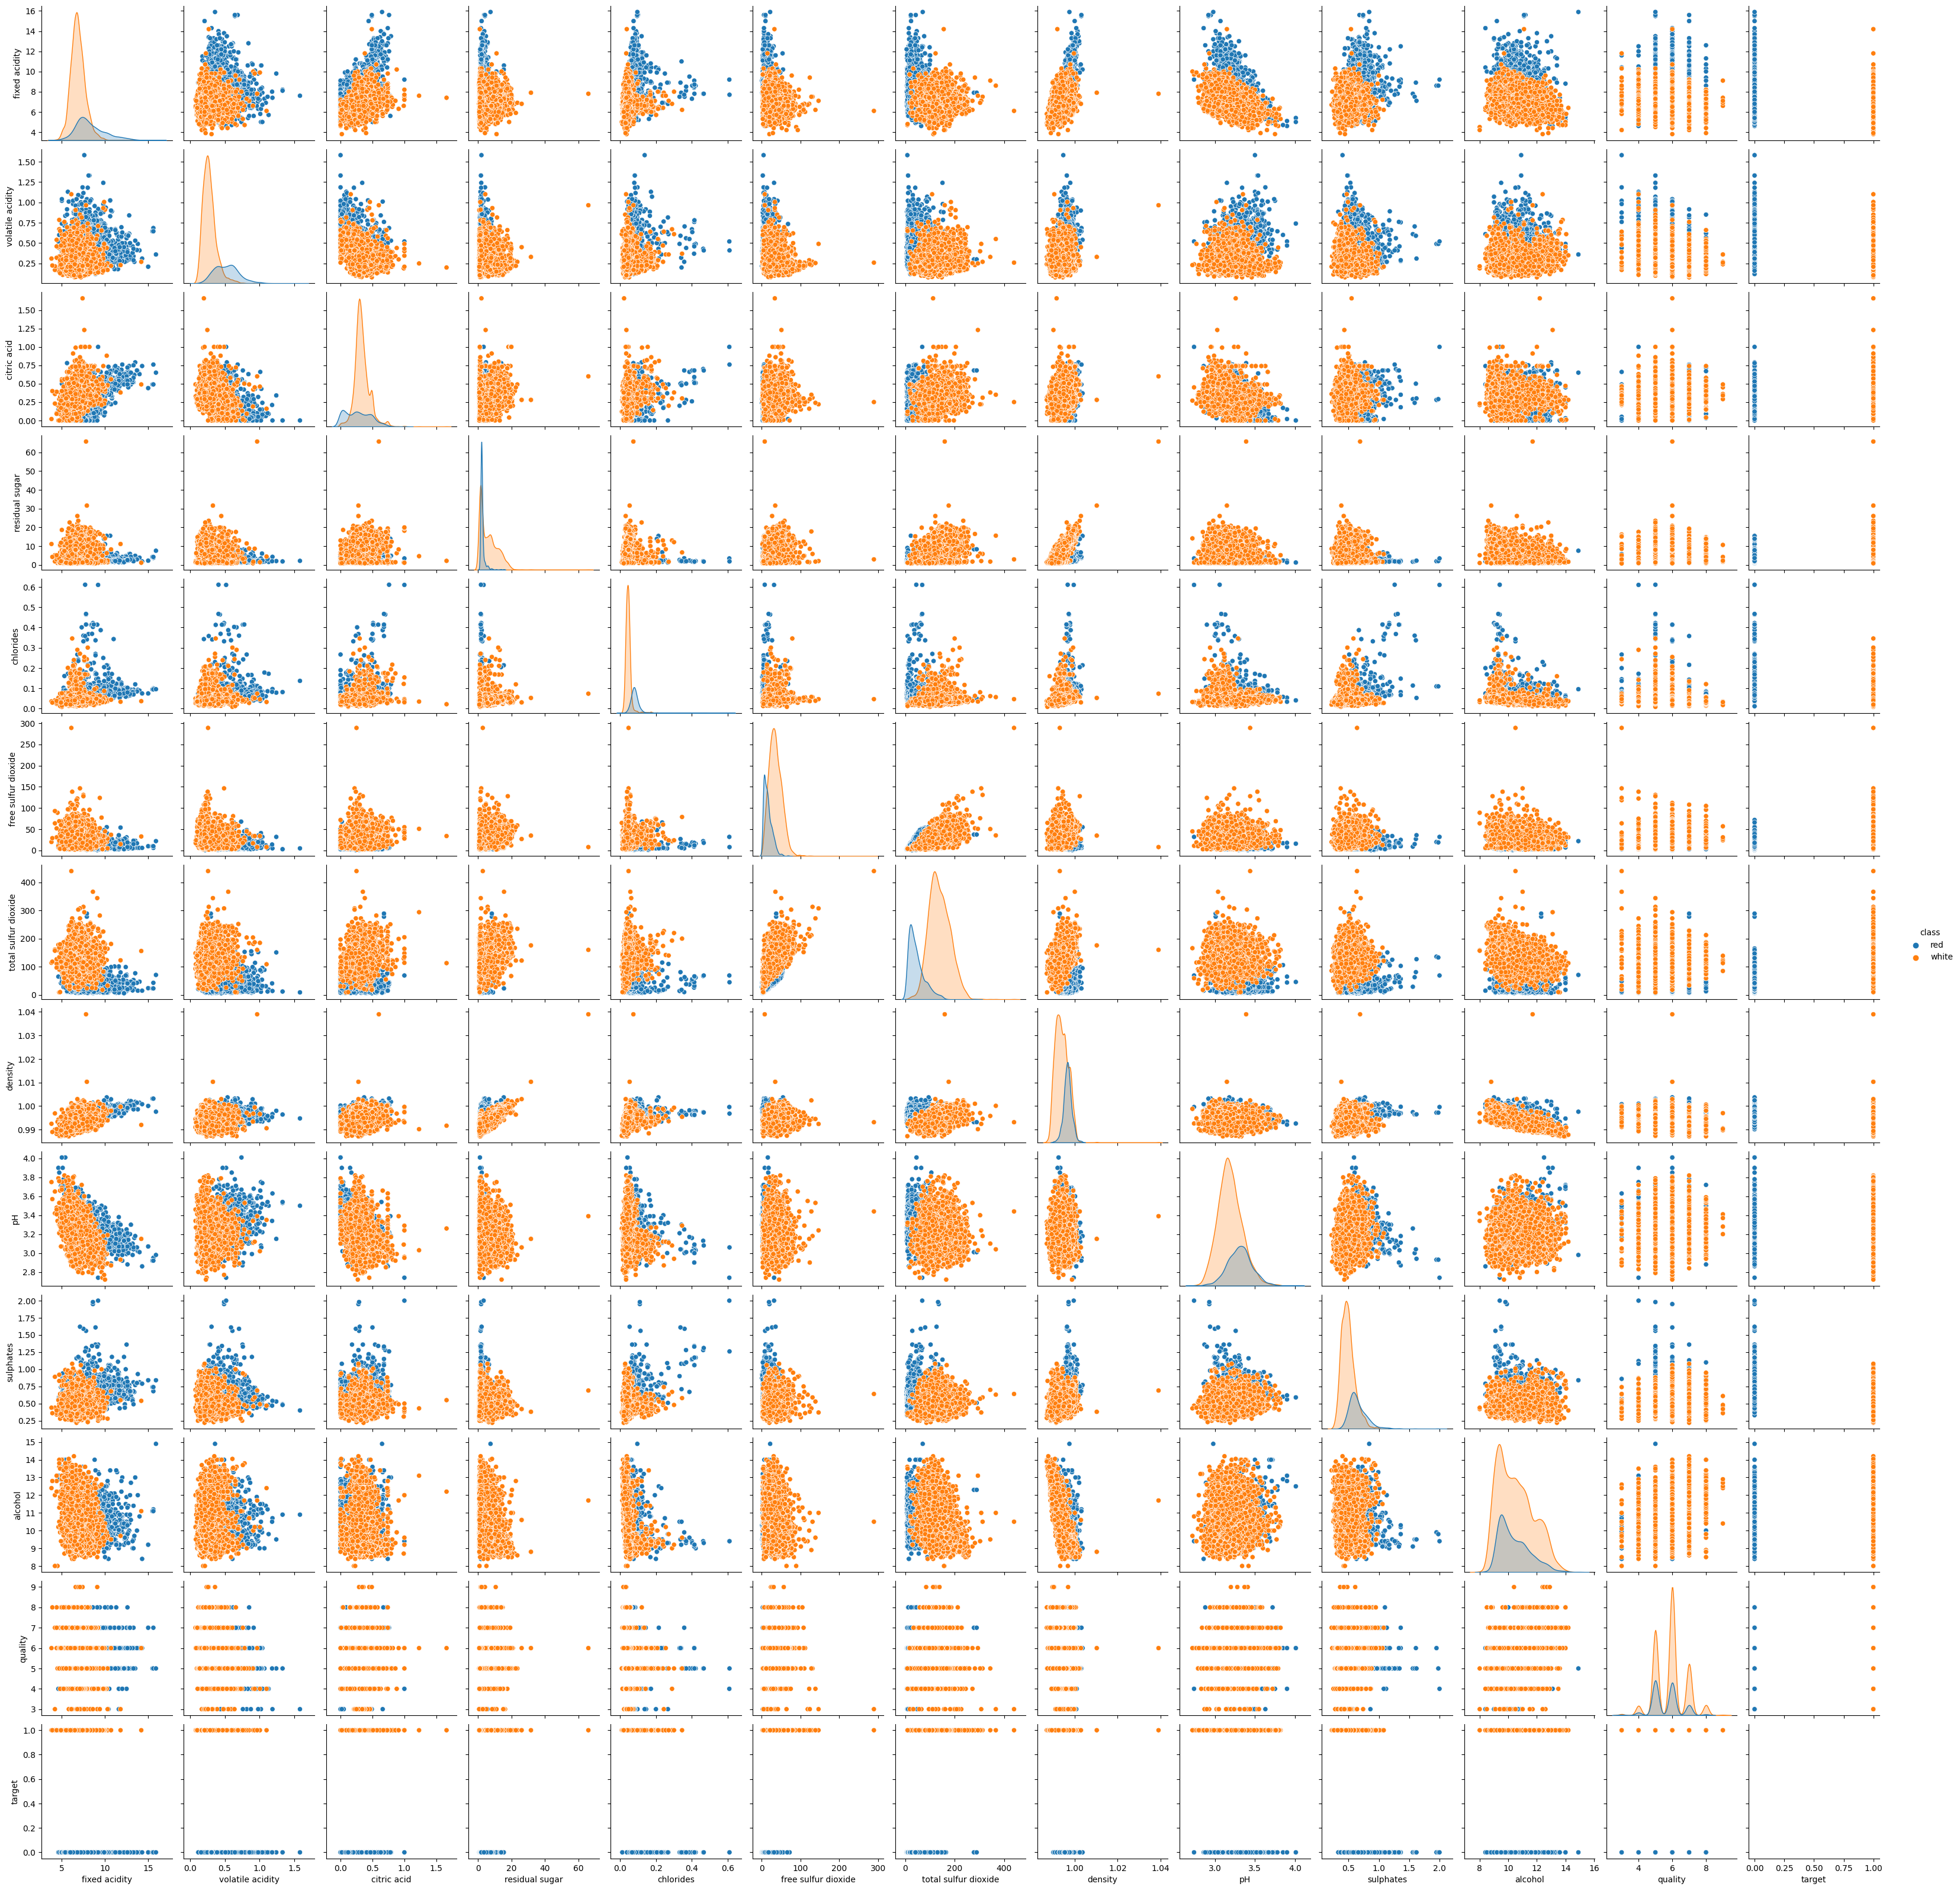

In [ ]:
sns.pairplot(wine_data, hue='class')

<ipython-input-12-0fe4f1f17f48>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine_data.corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')


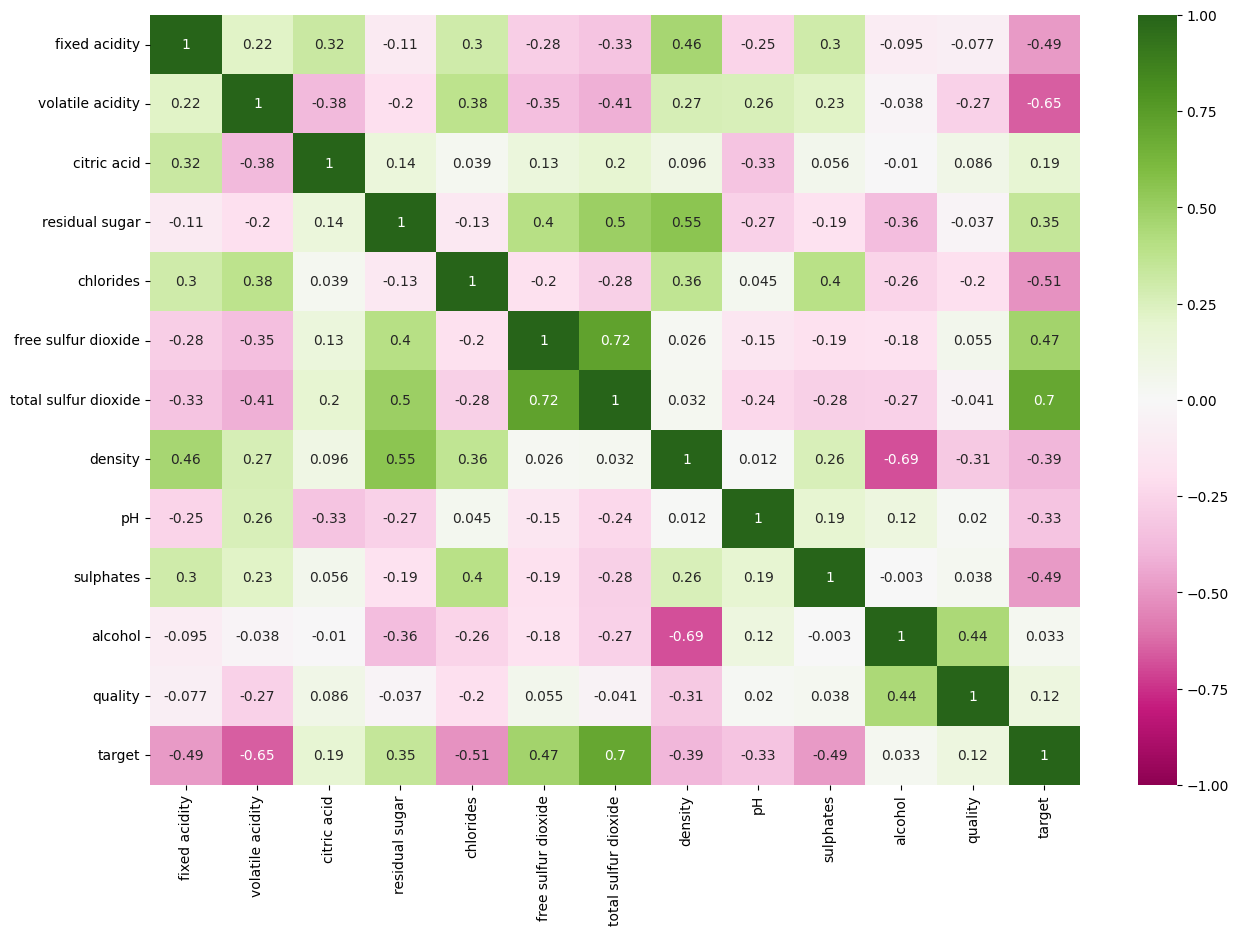

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(wine_data.corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')
plt.show()

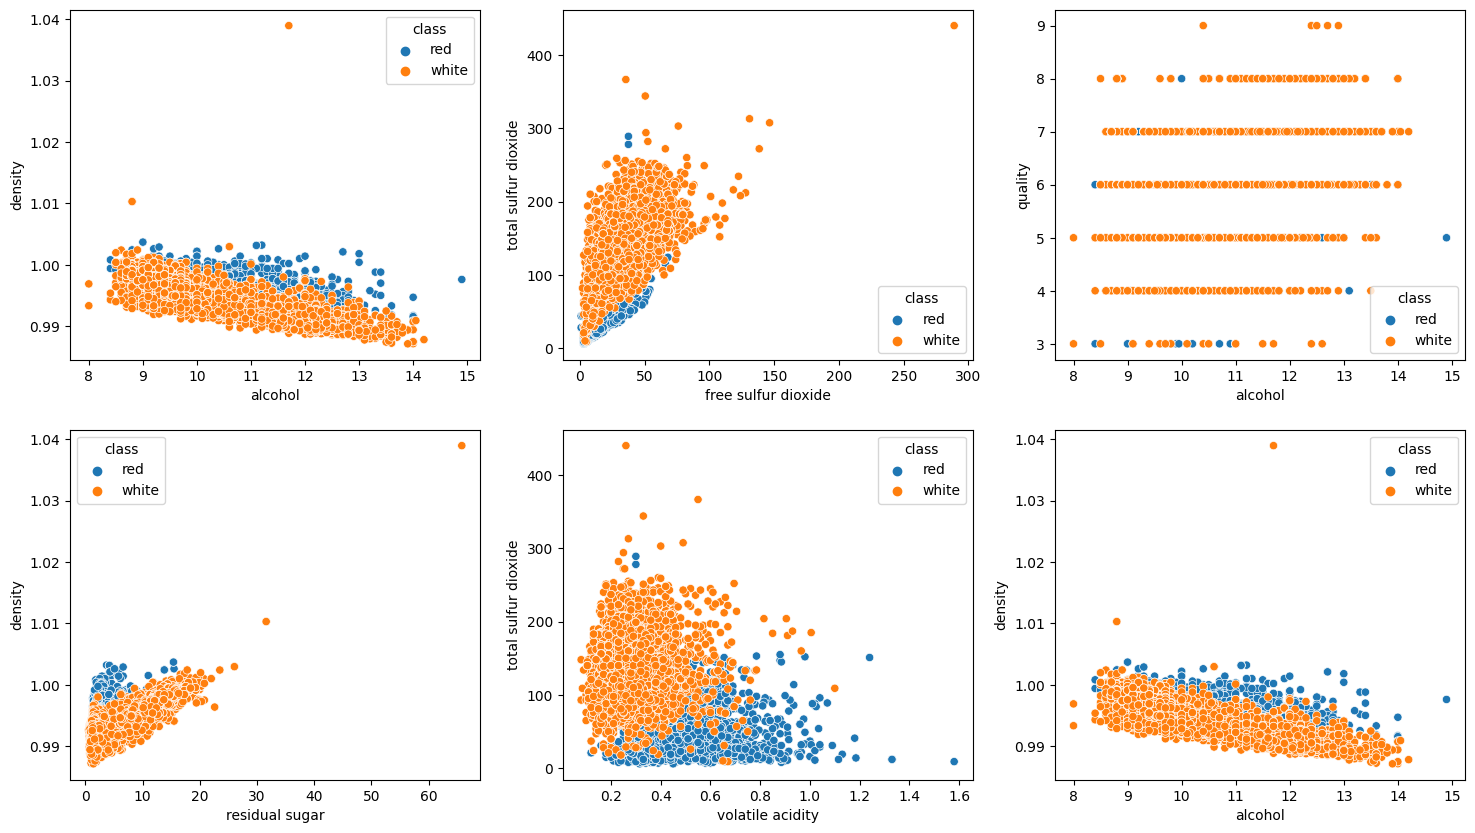

In [13]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
sns.scatterplot(data=wine_data, x='alcohol', y='density', hue='class', ax=axes[0, 0])
sns.scatterplot(data=wine_data, x='free sulfur dioxide', y='total sulfur dioxide', hue='class', ax=axes[0, 1])
sns.scatterplot(data=wine_data, x='alcohol', y='quality', hue='class', ax=axes[0, 2])
sns.scatterplot(data=wine_data, x='residual sugar', y='density', hue='class', ax=axes[1, 0])
sns.scatterplot(data=wine_data, x='volatile acidity', y='total sulfur dioxide', hue='class', ax=axes[1, 1])
sns.scatterplot(data=wine_data, x='alcohol', y='density', hue='class', ax=axes[1, 2])
plt.show()

<ipython-input-15-1fb6a9e798f5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=class`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=wine_data, x='total sulfur dioxide', hue='class', shade='class', ax=axes[0, 0])
<ipython-input-15-1fb6a9e798f5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=class`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=wine_data, x='free sulfur dioxide', hue='class', shade='class', ax=axes[0, 1])
<ipython-input-15-1fb6a9e798f5>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=class`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=wine_data, x='volatile acidity', hue='class', shade='class', ax=axes[0, 2])
<ipython-input-15-1fb6a9e798f5>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=class`.
This will be

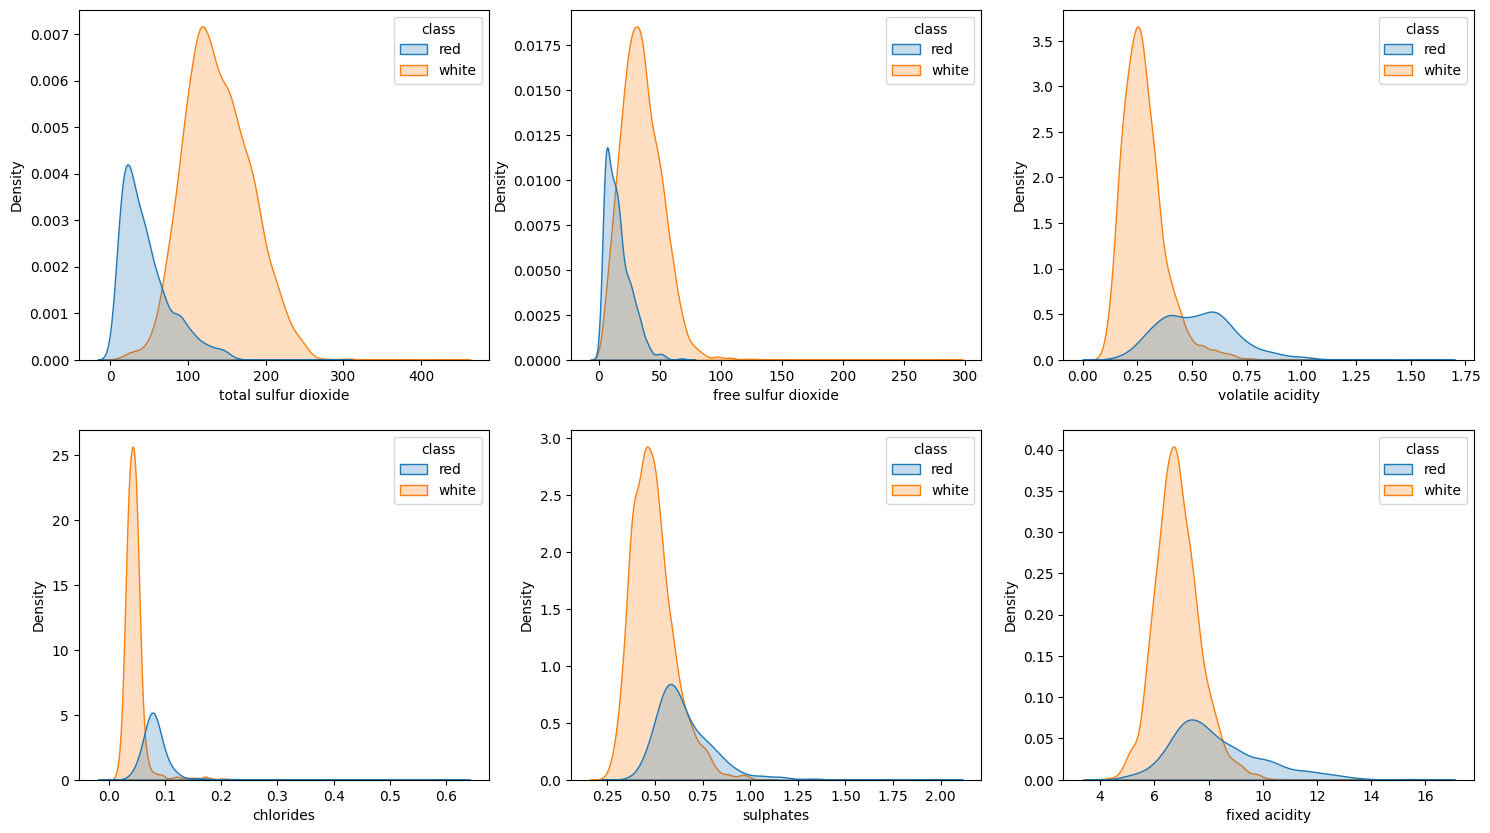

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
sns.kdeplot(data=wine_data, x='total sulfur dioxide', hue='class', shade='class', ax=axes[0, 0])
sns.kdeplot(data=wine_data, x='free sulfur dioxide', hue='class', shade='class', ax=axes[0, 1])
sns.kdeplot(data=wine_data, x='volatile acidity', hue='class', shade='class', ax=axes[0, 2])
sns.kdeplot(data=wine_data, x='chlorides', hue='class', shade='class', ax=axes[1, 0])
sns.kdeplot(data=wine_data, x='sulphates', hue='class', shade='class', ax=axes[1, 1])
sns.kdeplot(data=wine_data, x='fixed acidity', hue='class', shade='class', ax=axes[1, 2])
plt.show()

In [ ]:
wine_data.drop('class', axis=1, inplace=True)

In [ ]:
wine_data = wine_data.astype('float32')
data_X = wine_data.drop('target', axis=1)
data_y = wine_data['target']
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

White and Red Wine Classification using Support Vector Machines


In [ ]:
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [ ]:
svm_y_pred = svm_model.predict(X_test)
print('Accuracy Score', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report\n', classification_report(y_test, svm_y_pred))

Accuracy Score 0.9944615384615385
Confusion Matrix
 [[ 376    6]
 [   3 1240]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       382
         1.0       1.00      1.00      1.00      1243

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.001, 0.01, 0.1, 1, 10]}
svm_cv = StratifiedKFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring='accuracy')
svm_grid.fit(X_train, y_train)

In [ ]:
print('SVM Best Params:', svm_grid.best_params_)
print('SVM Best Score:', svm_grid.best_score_)

In [ ]:
svm_y_pred = svm_grid.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))